In [50]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns

Generate the example dataset

Text(0, 0.5, 'Y')

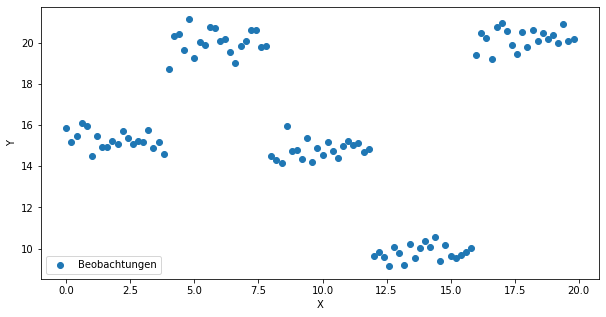

In [51]:
mean = 5
std = 0.5
n = 100

x = []
y = []

np.random.seed(0) # to make random noise reproduceable

for i in range(0,n):
    x.append(i/5)
    # create 5 buckets with noise around different means
    if 0 <= i < 20:
        y.append(10+np.random.normal(mean, std))
    elif 20 <= i < 40:
        y.append(15+np.random.normal(mean, std))
    elif 40 <= i < 60:
        y.append(10+np.random.normal(mean, std))
    elif 60 <= i < 80:
        y.append(5+np.random.normal(mean, std))
    else:
        y.append(15+np.random.normal(mean, std))

plt.figure(figsize=(10,5))
plt.scatter(x=x, y=y, label="Beobachtungen")
plt.legend(loc="lower left")
plt.xlabel("X")
plt.ylabel("Y")

Calculate internal values of GTB for first iterations

In [52]:
df = pd.DataFrame({"x": x, "y": y})
df["f0"] = df["y"].mean()
df["r1"] = df["y"] - df["f0"]
df["h1"] = np.where(df["x"] <= 15.9, -1.045, 4.181)
df["f1"] = df["f0"] + df["h1"]
df.round(2)

,x,y,f0,r1,h1,f1
0,0.0,15.88,16.03,-0.15,-1.04,14.98
1,0.2,15.20,16.03,-0.83,-1.04,14.98
2,0.4,15.49,16.03,-0.54,-1.04,14.98
3,0.6,16.12,16.03,0.09,-1.04,14.98
4,0.8,15.93,16.03,-0.10,-1.04,14.98
...,...,...,...,...,...,...
95,19.0,20.35,16.03,4.32,4.18,20.21
96,19.2,20.01,16.03,3.98,4.18,20.21
97,19.4,20.89,16.03,4.86,4.18,20.21
98,19.6,20.06,16.03,4.03,4.18,20.21


Plot first simple model f_0

Text(0, 0.5, 'Y')

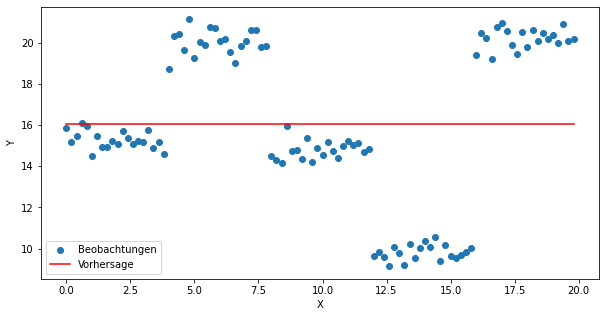

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(x=x, y=y, label="Beobachtungen")
line_predictions = plt.plot(x, np.full((1,100), df["y"].mean())[0], "-", color="red", label="Vorhersage")
plt.legend(loc="lower left")
plt.xlabel("X")
plt.ylabel("Y")

Create the GTB model

In [54]:
# reshape data to fit for sklearn GTB Regressor
X_train = np.array(x).reshape(-1, 1)
Y_train = np.array(y)

# train GTB Regressor
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=1, n_estimators=2)
model.fit(X_train, Y_train)

y_pred = model.predict(X_train) # make predictions
model.score(X_train, Y_train) # return accuracy score

0.10002431331091155

Visualize the first regression model inside the GTB model

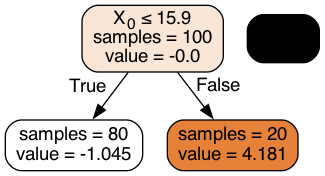

In [55]:
tree = model.estimators_[0,0] # change first 0 to any number m to get the regression model m 
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

Visualize the current prediction function on dataset

Text(0, 0.5, 'Y')

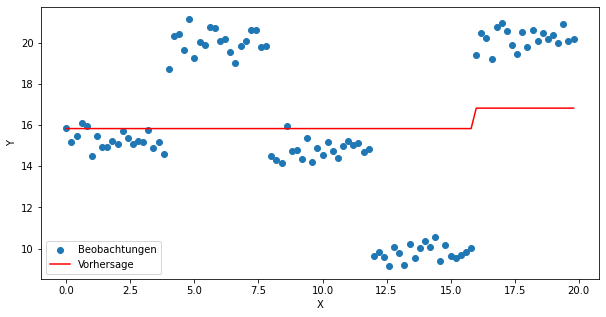

In [56]:
X_train = X_train.reshape(1,-1)[0] # reshape to fit for visualization
plt.figure(figsize=(10,5))
plt.scatter(x=X_train, y=Y_train, label="Beobachtungen")
line_predictions = plt.plot(X_train, y_pred, "-", color="red", label="Vorhersage")
plt.legend(loc="lower left")
plt.xlabel("X")
plt.ylabel("Y")